In [4]:
import pandas as pd
import numpy as np
import ast 

In [5]:
data = pd.read_csv("./dhlottery_data.csv")

In [6]:
win_nums = np.vstack(data["win_nums"].\
    apply(lambda x : np.array(ast.literal_eval(x))).values)

In [7]:
import ast

In [8]:
win_nums_pd = pd.DataFrame(win_nums, columns = [f"number_{i}" for i in range(1,7)])

In [9]:
lottery_num = np.unique(win_nums_pd.values.reshape(-1,1))

In [10]:
pd.DataFrame(np.zeros((1,len(lottery_num))) , columns = lottery_num)

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data["draw_date"] = pd.to_datetime(data["draw_date"])
data['year'] = pd.DatetimeIndex(data['draw_date']).year
data['month'] = pd.DatetimeIndex(data['draw_date']).month
data['Week_Number'] = data['draw_date'].dt.week

<ipython-input-11-3ab7204ebc2e>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week_Number'] = data['draw_date'].dt.week


In [12]:
import category_encoders as ce

In [13]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(lottery_num.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

In [14]:
table = []
accumulate_table = pd.DataFrame(np.zeros((1,len(lottery_num))),columns = lottery_num)
ratio_table = [accumulate_table]
action_table = []
for i , one_row in win_nums_pd.iterrows() :
    encoding = enc.transform(one_row.values.reshape(-1,1)).toarray().sum(axis=0)
    encoding_pd = pd.DataFrame([encoding], columns=lottery_num)
    action_table.append(encoding_pd)
    accumulate_table = accumulate_table+ encoding_pd
    if (i+1) == win_nums_pd.shape[0] : 
        print(i)
        test_table = accumulate_table/(i+1)
    else :
        ratio_table.append(accumulate_table/(i+1))



961


In [15]:
ratio_pd = pd.concat(ratio_table,axis=0).reset_index(drop=True)
action_pd = pd.concat(action_table,axis=0)

In [16]:
state_pd = pd.concat([ratio_pd,data[["year","month","Week_Number"]]],axis=1)
state_pd

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,year,month,Week_Number
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002,12,49
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002,12,50
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,2002,12,51
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,...,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,2002,12,52
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,2003,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.138976,0.130617,0.133751,0.138976,0.133751,0.123302,0.131661,0.133751,0.104493,0.138976,...,0.143156,0.144201,0.123302,0.129572,0.147335,0.132706,0.138976,2021,4,14
958,0.138831,0.131524,0.133612,0.138831,0.133612,0.123173,0.131524,0.133612,0.105428,0.139875,...,0.143006,0.144050,0.123173,0.129436,0.147182,0.132568,0.138831,2021,4,15
959,0.139729,0.131387,0.133472,0.138686,0.133472,0.123045,0.131387,0.133472,0.105318,0.139729,...,0.142857,0.144943,0.124088,0.129301,0.147028,0.132430,0.138686,2021,4,16
960,0.139583,0.132292,0.133333,0.138542,0.133333,0.122917,0.131250,0.133333,0.105208,0.139583,...,0.142708,0.144792,0.123958,0.129167,0.146875,0.132292,0.139583,2021,5,17


In [17]:
import datetime
today = datetime.date.today() 

test_table["year"] = today.year
test_table["month"] = today.month
test_table["Week_Number"] = today.isocalendar()[1]

test_table = test_table.loc[:,state_pd.columns.tolist()]
test_table

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,year,month,Week_Number
0,0.140333,0.132017,0.133056,0.138254,0.133056,0.122661,0.130977,0.133056,0.10499,0.139293,...,0.142412,0.144491,0.123701,0.129938,0.147609,0.132017,0.139293,2021,5,19


In [18]:
action_pd

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
import torch
from sklearn.preprocessing import LabelEncoder
fac_cols = ["year","month","Week_Number"]


# TODO

* Category 개수에 따라서 나눠서 처리하기
* 2개인 경우
    * 하나의 컬럼으로 사용
* 특정 n개 이하인 경우
    * one hot으로 사용
* 나머지
    * embedding 으로 처리 
    * min(50, (n+1)//2)

* 현재
    * min(50, (n+1)//2)

In [20]:
from copy import deepcopy
def collect_cat_info(df_input, fac_col ) :
    categorical_columns = []
    categorical_dims =  {}
    categorical_positions =  {}
    categorical_idxs =  []
    encodding_scaler = {}
    for idx , col in enumerate(df_input.columns.tolist()) :
        if col in fac_col :
            l_enc = LabelEncoder()
            df_input[col] = df_input[col].fillna("VV_likely")
            df_input[col] = l_enc.fit_transform(df_input[col].values)
            categorical_columns.append(col)
            categorical_dims[col] = (len(l_enc.classes_), min(50,(len(l_enc.classes_)+1)//2))
            categorical_positions[idx] = (len(l_enc.classes_), min(50,(len(l_enc.classes_)+1)//2))
            categorical_idxs.append(idx)
            encodding_scaler[col] = deepcopy(l_enc)
    return categorical_columns , categorical_idxs, categorical_dims , categorical_positions , encodding_scaler


In [21]:
emb_column, emb_idx , emb_dims ,emb_dims_idxs , encodding_scaler= collect_cat_info(state_pd , fac_cols)

In [22]:
  from torch import nn 
  

* Argument
    * __init__
        * input_length
        * emb_dims 
        * output_len
        * lin_layer_sizes
        * emb_dropout_ratio
    * forward
        * num
        * cat



```

output_len = action_pd.shape[1]
input_len = state_pd.shape[1]
######################################
emb_length = sum([y for idx, (x, y) in emb_dims_idxs.items()])
emb_layers = nn.ModuleDict([[str(idx) , nn.Embedding(x, y)] for idx, (x, y) in emb_dims_idxs.items()])
no_of_embs = sum([y for idx, (x, y) in emb_dims_idxs.items()])
no_of_fac = len([idx for idx, (x, y) in emb_dims_idxs.items()])
no_of_cont = input_len - no_of_fac
lin_layer_sizes = [50,25,10]
emb_dropout_ratio = 0.7
first_lin_layer = nn.Linear(no_of_embs +no_of_cont, lin_layer_sizes[0])
emb_dropout_layer = nn.Dropout(emb_dropout_ratio)
lin_layers =[first_lin_layer] +\
        [nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1])
        for i in range(len(lin_layer_sizes) - 1)]
for lin_layer in lin_layers:
    nn.init.kaiming_normal_(lin_layer.weight.data)
bn_layers = [nn.BatchNorm1d(size) for size in lin_layer_sizes]
output_layer = nn.Linear(lin_layer_sizes[-1], output_len)
lin_acts = [nn.SELU() for _ in range(len(lin_layer_sizes))]
inter_seq_layers = []
for l , b , a in zip(lin_layers , bn_layers , lin_acts) :
    inter_seq_layers.append(l)
    inter_seq_layers.append(b)
    inter_seq_layers.append(a)
inter_layers = nn.Sequential(*inter_seq_layers)
inter_layers
fac_tensor = torch.LongTensor(state_pd[fac_cols].values)
exclude_cols = fac_cols
con_tensor = torch.FloatTensor(state_pd.filter(regex="^(?!({0})$).*$".format('|'.join(exclude_cols))).values)
################
emb_tensor = torch.cat([emb_layer(fac_tensor[:,idx]) for idx, (col_idx , emb_layer) in enumerate(emb_layers.items())],axis=1)
emb_tensor = emb_dropout_layer(emb_tensor)
in_tensor = torch.cat([con_tensor,emb_tensor],axis=1)
inter_tensor = inter_layers(in_tensor)
output_tensor = output_layer(inter_tensor)

```

In [23]:
class TabularNN(nn.Module) :
    def __init__(self, input_length,emb_dims_dict,output_len,lin_layer_sizes,emb_dropout_ratio) :
        super(TabularNN,self).__init__()
        self.emb_layers = nn.ModuleDict([[str(idx) , nn.Embedding(x, y)] for idx, (x, y) in emb_dims_dict.items()])
        no_of_embs = sum([y for idx, (x, y) in emb_dims_dict.items()])
        no_of_fac = len([idx for idx, (x, y) in emb_dims_dict.items()])
        no_of_cont = input_len - no_of_fac
        first_lin_layer = nn.Linear(no_of_embs +no_of_cont, lin_layer_sizes[0])
        self.emb_dropout_layer = nn.Dropout(emb_dropout_ratio)
        lin_layers =[first_lin_layer] + \
            [nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1]) for i in range(len(lin_layer_sizes) - 1)]
        for lin_layer in lin_layers:
            nn.init.kaiming_normal_(lin_layer.weight.data)
        lin_acts = [nn.SELU() for _ in range(len(lin_layer_sizes))]
        bn_layers = [nn.BatchNorm1d(size) for size in lin_layer_sizes]
        inter_seq_layers = []
        for l , b , a in zip(lin_layers , bn_layers , lin_acts) :
            inter_seq_layers.append(l)
            inter_seq_layers.append(b)
            inter_seq_layers.append(a)
        self.inter_layers = nn.Sequential(*inter_seq_layers)
        self.output_layer = nn.Linear(lin_layer_sizes[-1], output_len)

    def forward(self, con_tensor , fac_tensor) :
        emb_tensor = torch.cat([emb_layer(fac_tensor[:,idx]) for idx, (col_idx , emb_layer) in enumerate(self.emb_layers.items())],axis=1)
        emb_tensor = self.emb_dropout_layer(emb_tensor)
        in_tensor = torch.cat([con_tensor,emb_tensor],axis=1)
        inter_tensor = self.inter_layers(in_tensor)
        output_tensor = self.output_layer(inter_tensor)
        return output_tensor

    def check_array(self, x) :
        print(x)
        if x.ndim == 1 :
            return x.unsqueeze(dim=0)
        elif x.ndim == 2 :
            return x
        else :
            raise Exception(f"Check dimension : {x.ndim}")




            

In [24]:
output_len = action_pd.shape[1]
input_len = state_pd.shape[1]
tabular_nn = TabularNN(input_len , emb_dims_idxs , output_len , [100,50,20],0.8)

In [25]:
fac_tensor = torch.LongTensor(state_pd[fac_cols].values)
exclude_cols = fac_cols
con_tensor = torch.FloatTensor(state_pd.filter(regex="^(?!({0})$).*$".format('|'.join(exclude_cols))).values)

In [26]:
tabular_nn(con_tensor,fac_tensor)

tensor([[-0.1394,  0.4289, -0.7825,  ..., -0.6321, -0.5225,  0.2592],
        [-0.0764,  0.6583, -0.8885,  ..., -0.0278,  0.3486, -0.2071],
        [ 0.8856, -0.1202, -0.9562,  ...,  0.9127, -0.4619, -0.2076],
        ...,
        [-0.0851,  0.1615,  0.7453,  ..., -0.2432,  1.1484,  0.3750],
        [-0.5781,  0.0517,  0.7594,  ..., -0.6000,  1.0679,  0.7406],
        [-0.0296, -0.0877,  0.5714,  ...,  0.5111,  1.1742,  0.7140]],
       grad_fn=<AddmmBackward>)

In [27]:
from torch.utils.data import Dataset, DataLoader


class TabularDataset(Dataset):
    def __init__(self, X,Y,fac_cols) :
        self.num_cols = []
        for col in X.columns.tolist() :
            if col not in fac_cols :
                self.num_cols.append(col)
        self.fac_cols = fac_cols
        self.n = X.shape[0]
        if self.num_cols :
            self.cont_x = X[self.num_cols].astype(np.float32).values     
        else :
            self.cont_X = np.zeros((self.n, 1))
        if self.fac_cols :
            self.fac_x = X[fac_cols].astype(np.int32).values
        else :
            self.fac_x = np.zeros((self.n, 1))
        if Y is None :
            self.y = np.zeros((self.n, 1))
        else : 
            self.y = Y.values.astype(np.int32)

    def __len__(self) :
        return self.n

    def __getitem__(self,idx) :
        return [self.cont_x[idx], self.fac_x[idx] , self.y[idx]]

In [28]:
dataset  = TabularDataset(state_pd , action_pd, fac_cols)
batchsize= 32
dataloader = DataLoader(dataset, batchsize, shuffle=True, num_workers=5)

optimizer = torch.optim.Adam(tabular_nn.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.0005)

In [29]:
x_cont_batch, x_fac_batch , y_batch = next(iter(dataloader))

In [30]:
"""
https://stackoverflow.com/questions/38543506/change-logging-print-function-to-tqdm-write-so-logging-doesnt-interfere-wit
"""
import logging
from tqdm import tqdm

class TqdmLoggingHandler(logging.StreamHandler):
    """Avoid tqdm progress bar interruption by logger's output to console"""
    # see logging.StreamHandler.eval method:
    # https://github.com/python/cpython/blob/d2e2534751fd675c4d5d3adc208bf4fc984da7bf/Lib/logging/__init__.py#L1082-L1091
    # and tqdm.write method:
    # https://github.com/tqdm/tqdm/blob/f86104a1f30c38e6f80bfd8fb16d5fcde1e7749f/tqdm/std.py#L614-L620

    def emit(self, record):
        try:
            msg = self.format(record)
            tqdm.write(msg, end=self.terminator)
        except RecursionError:
            raise
        except Exception:
            self.handleError(record)
import time

log = logging.getLogger(__name__)
log.handlers = []
log.setLevel(logging.INFO)
log.addHandler(TqdmLoggingHandler())

In [31]:
if os.path.isfile("./model.pt") :
    checkpoint = torch.load("./model.pt")
    tabular_nn.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    # epoch = checkpoint['epoch']
    loss_store = checkpoint['loss_history']
else :
    loss_store = []

In [3]:
criterion = nn.BCEWithLogitsLoss()
tabular_nn.train()
pbar = tqdm(range(10000))
for epoch in pbar :
    loss_ = 0
    for x_cont_batch, x_fac_batch , y_batch in dataloader :
        logit = tabular_nn(x_cont_batch,x_fac_batch)
        # prob = nn.Sigmoid()(logit)
        loss = criterion(logit , y_batch.float())
        # Backward Pass and Optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        loss_ += loss.detach().numpy()
    _loss_ = loss_/len(dataloader)
    loss_store.append(_loss_)
    if len(loss_store) > 1 :
        if  _loss_ < np.min(loss_store[:-1]) : 
            torch.save({'epoch': epoch,
            'model_state_dict': tabular_nn.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss_history' : loss_store,
            },"./model.pt")
    if epoch % 500 == 0 :
        log.info(f"loss : {str(loss_/len(dataloader))}, minimum : {np.min(loss_store)}")
    pbar.set_postfix({'loss': _loss_, 'best' : np.min(loss_store)})

NameError: name 'nn' is not defined

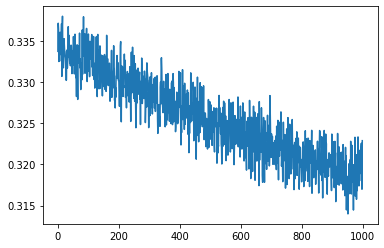

In [236]:
import matplotlib.pyplot as plt 
plt.plot(range(len(loss_store)) ,loss_store)
plt.show()

In [237]:
test_dataloader = DataLoader(dataset, len(state_pd), shuffle=False, num_workers=5)

In [238]:
tabular_nn.eval()
for x_cont_batch, x_fac_batch , y_batch in test_dataloader :
    logit = tabular_nn(x_cont_batch,x_fac_batch)

In [239]:
logit

tensor([[-1.4958, -1.9882, -1.9993, -1.6830, -2.4763, -3.2397, -1.9744, -2.8495,
         -2.0562, -1.5979, -2.0333, -1.4269, -0.8203, -3.5980, -3.0775, -1.9140,
         -2.9665, -1.7668, -2.2052, -2.0239, -2.6634, -2.8741, -3.3897, -1.8810,
         -2.5031, -2.2039, -2.1934, -1.1100, -2.0915, -1.5654, -2.4964, -2.6574,
          0.0290, -1.5563, -1.4085, -2.2094, -2.2565, -2.3308, -2.0501, -1.6354,
         -1.1710, -1.7590, -1.2748, -3.6602, -2.3688]],
       grad_fn=<AddmmBackward>)

In [240]:
prediction = torch.topk(nn.Sigmoid()(logit), 6)[1].detach().numpy() + 1

In [241]:
prediction.sort(axis=1)

In [242]:
pd.DataFrame(prediction,columns=[f"pred_number_{i+1}" for i in range(prediction.shape[1])])

,pred_number_1,pred_number_2,pred_number_3,pred_number_4,pred_number_5,pred_number_6
0,13,28,33,35,41,43


In [243]:
win_nums_pd

,number_1,number_2,number_3,number_4,number_5,number_6
0,10,23,29,33,37,40
1,9,13,21,25,32,42
2,11,16,19,21,27,31
3,14,27,30,31,40,42
4,16,24,29,40,41,42
...,...,...,...,...,...,...
957,2,9,10,16,35,37
958,1,14,15,24,40,41
959,2,18,24,30,32,45
960,11,20,29,31,33,42


In [244]:
state_pd.tail(1)

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,year,month,Week_Number
961,0.139438,0.132154,0.133195,0.138398,0.133195,0.122789,0.131113,0.133195,0.105099,0.139438,...,0.14256,0.144641,0.123829,0.130073,0.146722,0.132154,0.139438,19,4,17


In [245]:
test_table_ch = deepcopy(test_table)
for col , scaler in encodding_scaler.items() :
    test_table_ch[col] = test_table_ch[col].fillna("VV_likely")
    test_table_ch[col] = scaler.transform(test_table_ch[col])

In [327]:
dataset  = TabularDataset(test_table_ch , None, fac_cols)
loader = DataLoader(dataset, len(test_table_ch), shuffle=False, num_workers=1)
x_cont_batch, x_fac_batch , y_batch = next(iter(loader))

In [328]:
test_table

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,year,month,Week_Number
0,0.140333,0.132017,0.133056,0.138254,0.133056,0.122661,0.130977,0.133056,0.10499,0.139293,...,0.142412,0.144491,0.123701,0.129938,0.147609,0.132017,0.139293,2021,5,19


In [329]:

logit = tabular_nn(x_cont_batch,x_fac_batch)
prediction = torch.topk(nn.Sigmoid()(logit), 6)[1].detach().numpy() + 1
prediction.sort(axis=1)
best_candidate = pd.DataFrame(prediction,columns=[f"pred_number_{i+1}" for i in range(prediction.shape[1])])
best_candidate

,pred_number_1,pred_number_2,pred_number_3,pred_number_4,pred_number_5,pred_number_6
0,13,28,33,35,41,43


In [330]:
candidate_n = 10
prediction = torch.topk(nn.Sigmoid()(logit), candidate_n)[1].detach().numpy() + 1
prediction.sort(axis=1)
candidate_number = pd.DataFrame(prediction,columns=[f"pred_number_{i+1}" for i in range(prediction.shape[1])])
candidate_number

,pred_number_1,pred_number_2,pred_number_3,pred_number_4,pred_number_5,pred_number_6,pred_number_7,pred_number_8,pred_number_9,pred_number_10
0,1,12,13,28,30,33,34,35,41,43


In [331]:
from itertools import combinations 

In [332]:
 comb = np.array(list(combinations(prediction.tolist()[0] , 6)))

In [333]:
indices = np.where( (comb.sum(axis=1) > 140) & (comb.sum(axis=1) <150))[0]

In [334]:
candidate = pd.DataFrame(comb[indices,],columns=[f"pred_number_{i+1}" for i in range(comb.shape[1])])#
pd.concat([best_candidate,candidate],axis=0).to_csv("./210515_963회_추천번호.csv",index=False)
